<a href="https://colab.research.google.com/github/Jeevikavishwakarma/PRODIGY_DS_03/blob/main/Internship_Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task - 03
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

[Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)





In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("bank-full.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data = data.drop(["balance", "day","month","campaign","pdays"],axis =1)
data.head()

,age,job,marital,education,default,housing,loan,contact,duration,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,261,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,151,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,76,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,92,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,198,0,unknown,no


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,duration,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,261,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,151,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,76,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,92,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,198,0,unknown,no


In [ ]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
data['y'] = LabelEncoder().fit_transform(data['y'])
data = pd.get_dummies(data, drop_first=True)

X = data.drop('y', axis =1)
Y = data['y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion ='gini', max_depth =5, random_state =42)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy score: ",accuracy_score(Y_test, y_pred))

Accuracy score:  0.9015813336282207


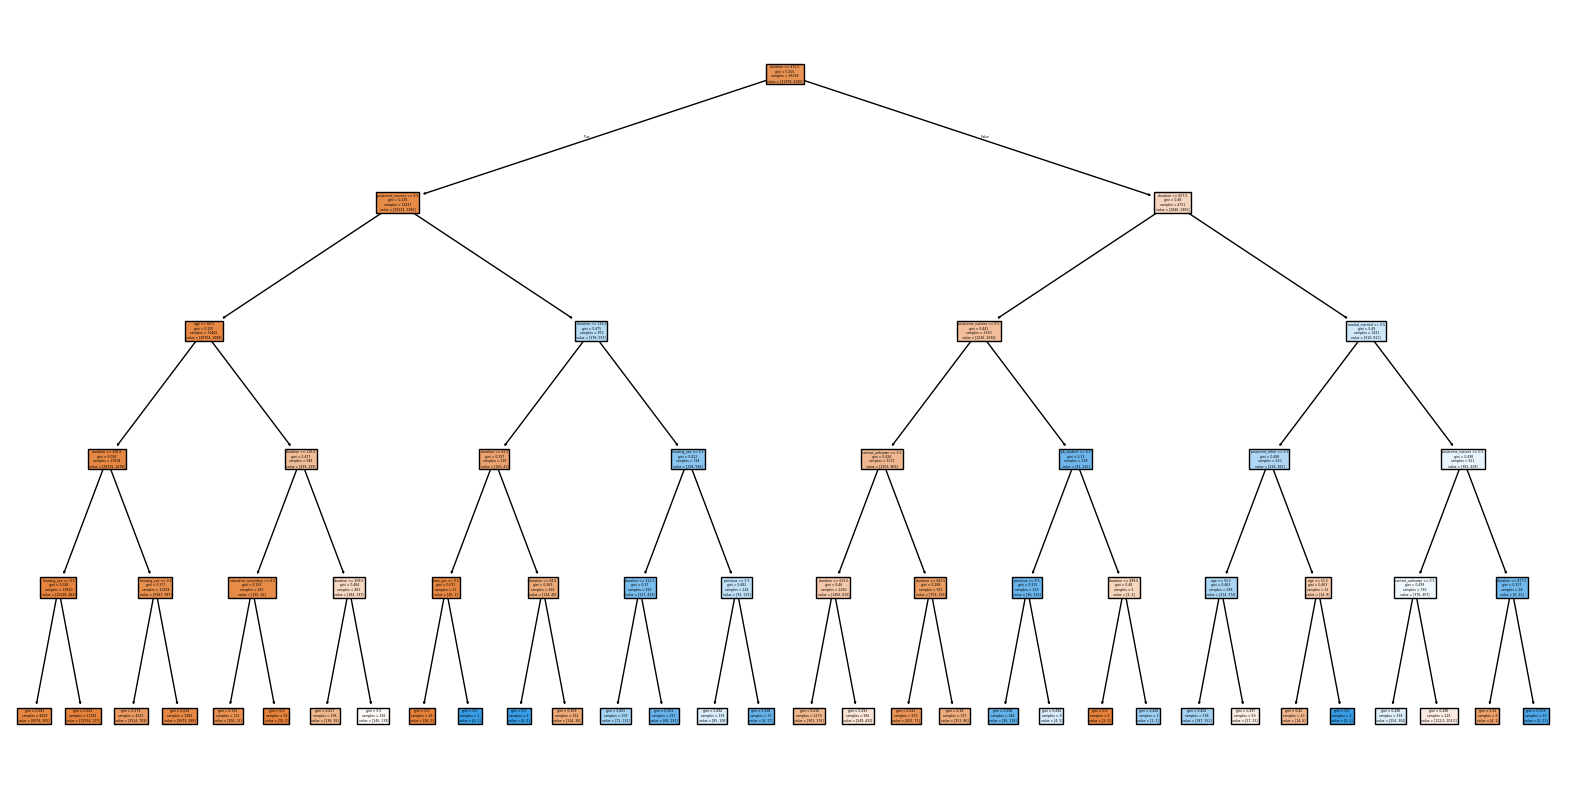

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plot_tree(dtree, filled = True, feature_names = X_train.columns)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X_train, Y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_tree = grid_search.best_estimator_

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
